In [1]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# import from parent directory
sys.path.append("..")
from utils import create_onedrive_directdownload

# plt.style.use("ggplot")

In [2]:
file_url = "https://1drv.ms/u/s!AiqdXCxPTydhoogVbtUx-_t81U4S7A?e=SsYLao"
dataset_url = create_onedrive_directdownload(file_url)
print(dataset_url)
close = pd.read_csv(dataset_url)

goog = close[["Unnamed: 0", "GOOG"]].copy().dropna()\
    .rename(columns={"Unnamed: 0":"index"}).set_index(keys=["index"])
goog.head()

https://api.onedrive.com/v1.0/shares/u!aHR0cHM6Ly8xZHJ2Lm1zL3UvcyFBaXFkWEN4UFR5ZGhvb2dWYnRVeC1fdDgxVTRTN0E_ZT1Tc1lMYW8/root/content


,GOOG
index,
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


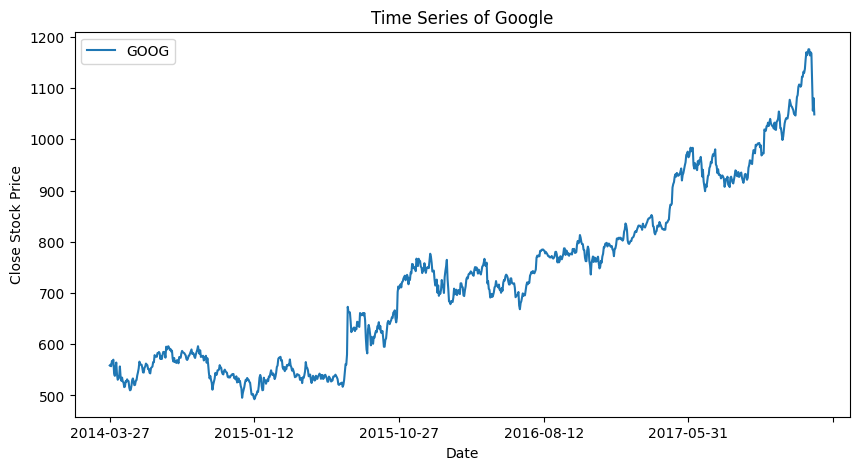

In [3]:
goog.plot(figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.title("Time Series of Google")
plt.show()

In [4]:
# calculate the log returns. For pct_change method, you can visit 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
# Percentage change between the current and a prior element.
goog_ret = np.log(goog.pct_change(1) + 1)

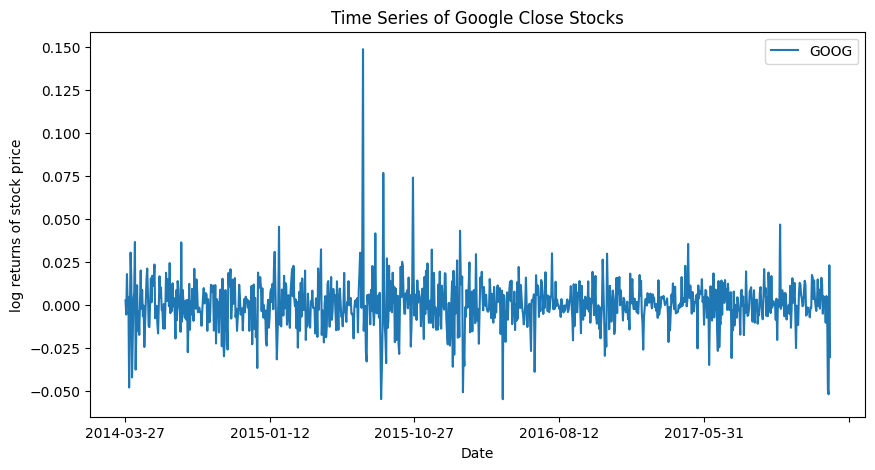

In [5]:
goog_ret.plot(figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("log returns of stock price")
plt.title("Time Series of Google Close Stocks")
plt.show()

In [6]:
# Simple Moving Average based on rolling window = 10
goog["SMA-10"] = goog["GOOG"].rolling(10).mean()
goog.head(20)

,GOOG,SMA-10
index,,
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN


In [7]:
# what type of obj, this rolling method returns?
type(goog["GOOG"].rolling(10))

pandas.core.window.rolling.Rolling

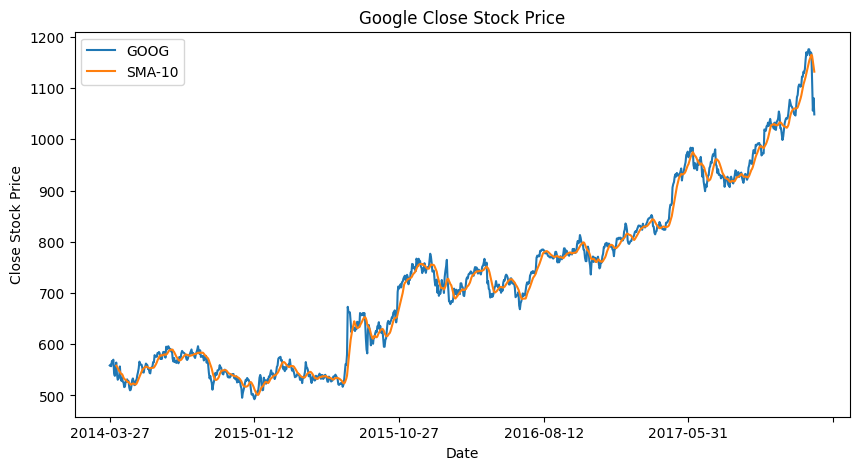

In [8]:
goog.plot(figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.title("Google Close Stock Price")
plt.show()

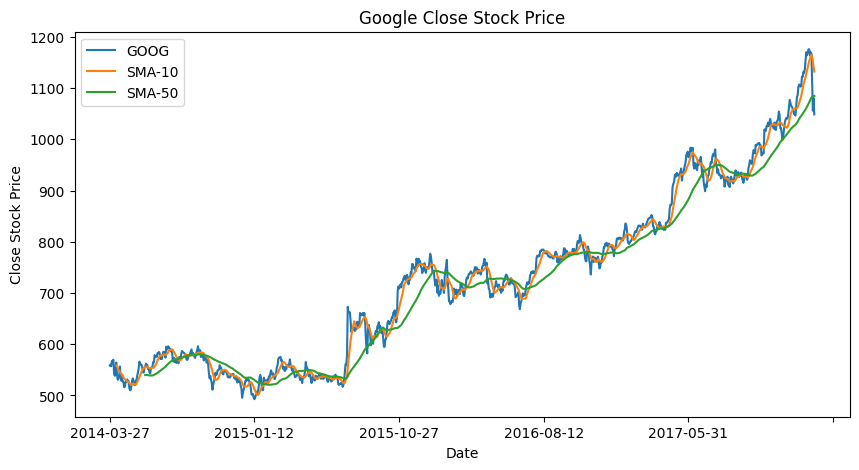

In [9]:
# Another SMA: rolling window is now 50
goog["SMA-50"] = goog["GOOG"].rolling(window=50).mean()

goog.plot(figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.title("Google Close Stock Price")
plt.show()

In [10]:
# now working with multi-dimentional time-series
goog_aapl = close[["Unnamed: 0", "GOOG", "AAPL"]].copy().dropna() \
                .rename(columns={"Unnamed: 0": "index"}) \
                .set_index(keys=["index"])
# calculate the covariance
cov = goog_aapl.rolling(window=50).cov()
cov

GOOG       AAPL
index                                  
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [11]:
# convert the last value of cov dataframe to numpy
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [12]:
# now, calculate the log returns
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.head()

,GOOG,AAPL
index,,
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


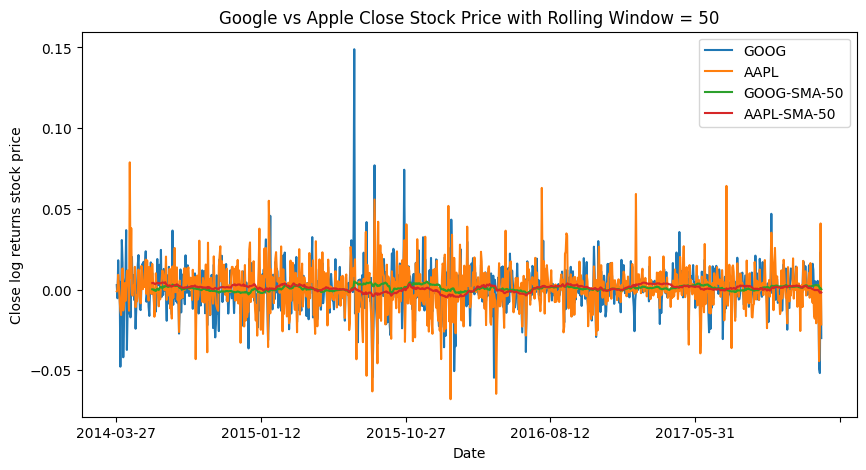

In [13]:
goog_aapl_ret["GOOG-SMA-50"] = goog_aapl_ret["GOOG"].rolling(window=50).mean()
goog_aapl_ret["AAPL-SMA-50"] = goog_aapl_ret["AAPL"].rolling(window=50).mean()

goog_aapl_ret.plot(figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Close log returns stock price")
plt.title("Google vs Apple Close Stock Price with Rolling Window = 50")
plt.show()

In [14]:
# calculate the covariance
cov = goog_aapl_ret[["GOOG", "AAPL"]].rolling(50).cov()
cov.tail()

GOOG      AAPL
index                              
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [15]:
corr = goog_aapl_ret[["GOOG", "AAPL"]].rolling(50).corr()
corr.tail(16)

GOOG      AAPL
index                              
2018-01-29 GOOG  1.000000  0.531436
           AAPL  0.531436  1.000000
2018-01-30 GOOG  1.000000  0.525389
           AAPL  0.525389  1.000000
2018-01-31 GOOG  1.000000  0.515233
           AAPL  0.515233  1.000000
2018-02-01 GOOG  1.000000  0.510051
           AAPL  0.510051  1.000000
2018-02-02 GOOG  1.000000  0.671209
           AAPL  0.671209  1.000000
2018-02-05 GOOG  1.000000  0.681098
           AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000